# This Notebook is suppopsed to serve as my Project for INT418 Deep Learning Project  

## In this Notebook, I am going to attempt to classify images of car and predict their brand 

## Table of Contents 

* [Import libraries and the data](#import_libraries)
* [Set up the Data](#set_up_data)
* [Pandas DataFrames and images](#pd_images)
    * [Test and Training DataFrames](#train_test_df)
   
* [Categorizing string data and choosing the cars](#some_insight)

* [Setting up the Convolutional Network](#cnn)
    * [Using Keras' flow_from_dataframe to load the dataset](#flow_from_dataframe)
    
* [Results for Mercedes](#mercedes_results)    
    * [Visualize correct and wrong predictions for Mercedes](#merc-plots)

* [Results for BMW](#bmw)
    * [Visualize correct and wrong predictions for BMW](#bmw_plots)

* [Results for Audi](#Audi)
    * [Visualize correct and wrong predictions for Audi](#audi-plots)

* [Final thoughts](#final)


<a id ='import_libraries'></a>

## <font color = 'purple'>   Let's start off by importing some of the libraries that we will be using. </font>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app #A powerful interactive Python shell and a Jupyter kernel to work with Python code in Jupyter notebooks and other interactive frontends.
import os


# Deep Learning libraries 
import tensorflow as tf
import PIL as  pil 
#Python Imaging Library (PIL)support for opening, manipulating, and saving many different image file formats
from PIL import Image
import keras
from keras.models import Sequential #linear stack of layers
from keras.layers import Conv2D #this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputsr
from keras.layers import MaxPooling2D # Downsamples the input representation by taking the maximum value
from keras.layers import Dropout #randomly sets input units to 0
from keras.layers import Flatten #reshapes the tensor
from keras.layers import Dense # the operation: output = activation(dot(input, kernel) + bias)
# from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras_preprocessing.image import ImageDataGenerator, load_img
!wget 'https://raw.githubusercontent.com/keras-team/keras-preprocessing/d3d58f5c6e2ef8b6270301415738ecb6deee2042/keras_preprocessing/image.py'
# Wget is a free GNU command-line utility tool used to download files from the internet
from image import ImageDataGenerator

import os
# print(os.listdir("../input"))
print(os.listdir("/kaggle/input"))


# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


--2020-11-01 12:49:05--  https://raw.githubusercontent.com/keras-team/keras-preprocessing/d3d58f5c6e2ef8b6270301415738ecb6deee2042/keras_preprocessing/image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97591 (95K) [text/plain]
Saving to: ‘image.py’

image.py            100%[===================>]  95.30K  --.-KB/s    in 0.03s   

2020-11-01 12:49:05 (2.93 MB/s) - ‘image.py’ saved [97591/97591]

['car_data', 'anno_train.csv', 'names.csv', 'anno_test.csv']


In [ ]:
keras.__version__

'2.2.4'

## <font color ='purple'>....and also by loading in the data that we will be using. </font>

In [ ]:
names = pd.read_csv("/kaggle/input/names.csv")
names.sample(10)
# names.describe()

,AM General Hummer SUV 2000
60,Chevrolet Tahoe Hybrid SUV 2012
61,Chevrolet Sonic Sedan 2012
94,Dodge Charger Sedan 2012
79,Chrysler PT Cruiser Convertible 2008
162,Mercedes-Benz E-Class Sedan 2012
3,Acura TSX Sedan 2012
44,Bugatti Veyron 16.4 Coupe 2009
130,Hyundai Tucson SUV 2012
141,Isuzu Ascender SUV 2008
128,Hyundai Veloster Hatchback 2012


In [ ]:
anno_train = pd.read_csv("/kaggle/input/anno_train.csv")
anno_train.sample(10)
# anno_train.describe()

,00001.jpg,39,116,569,375,14
6069,06071.jpg,37,34,347,207,19
1088,01090.jpg,15,57,528,299,153
2085,02087.jpg,19,533,3220,1953,30
1935,01937.jpg,212,192,578,332,103
4150,04152.jpg,28,58,226,150,27
7902,07904.jpg,74,50,315,157,74
1427,01429.jpg,14,90,490,320,127
1348,01350.jpg,105,315,780,561,157
7912,07914.jpg,53,276,1330,723,161
574,00576.jpg,20,24,232,156,119


<a id = 'set_up_data'></a>

# <font color = 'purple'> So here is where we are going to set up the data for all these images.  </font>

## <font color = 'green'> Let's start by loading the folders which contain the dataset and exploring them!!! <font>

In [ ]:
# Folder containng all the files for the test set. 
car_test= "/kaggle/input/car_data/car_data/test/"


In [ ]:
# Folder containing all the training data.
car_train = "/kaggle/input/car_data/car_data/train/"
print('There are', len(os.listdir(car_train)),'folders in the training dataset')
# os.listdir(car_train)

There are 196 folders in the training dataset


In [ ]:
car_test = "/kaggle/input/car_data/car_data/test/"
os.listdir(car_test)

['Rolls-Royce Ghost Sedan 2012',
 'Chevrolet Corvette Ron Fellows Edition Z06 2007',
 'Dodge Journey SUV 2012',
 'Buick Enclave SUV 2012',
 'Suzuki SX4 Sedan 2012',
 'Volvo 240 Sedan 1993',
 'Mercedes-Benz S-Class Sedan 2012',
 'Audi S5 Coupe 2012',
 'Land Rover Range Rover SUV 2012',
 'Chrysler Aspen SUV 2009',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Coupe 2012',
 'Dodge Ram Pickup 3500 Quad Cab 2009',
 'Cadillac Escalade EXT Crew Cab 2007',
 'Hyundai Sonata Hybrid Sedan 2012',
 'Chevrolet Malibu Hybrid Sedan 2010',
 'Dodge Magnum Wagon 2008',
 'Volkswagen Golf Hatchback 2012',
 'Toyota 4Runner SUV 2012',
 'Hyundai Veracruz SUV 2012',
 'Nissan Juke Hatchback 2012',
 'AM General Hummer SUV 2000',
 'MINI Cooper Roadster Convertible 2012',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Lamborghini Diablo Coupe 2001',
 'Daewoo Nubira Wagon 2002',
 'Dodge Caravan Minivan 1997',
 'Dodge Durango SUV 2007',
 'Mercedes-Benz E-Class Sedan 2012',
 'Dodge Charger SRT-8 2009',
 'Rolls-

<a id= 'pd_images'></a>
# <font color = 'purple'> I am going to use pandas dataframe to store the information of pictures </font>
**In the code cell below, I am going to create a function called **pd_images** that will take a folder path and store the files located under that path by recursively going through all the subfolders. It will store the names of folders as the labels of the images.**

In [ ]:
# I am setting up a function here that takes the training and test set data and transforms it into a pandas dataframe

def pd_images(folder, is_training = True):
    data = list()
    for labels in os.listdir(car_train):
        for label in os.listdir(car_train+labels):
            if is_training == True:
                car_add = car_train + labels + '/' + label
            else:
                car_add = car_test+ labels + '/' + label
            car_value= (labels, car_add)                
            if car_value not in data:
                data.append(car_value)   

    pd_images = pd.DataFrame(np.array(data).reshape(8144,2), columns= ["car", "image path"])
    
    return pd_images



<a id = 'train_test_df'></a>
# <font color = 'purple'>Here is a sample of what the dataFrame would look like containing all the inforamtion for the training and the test set. </font>

In [ ]:
train_df = pd_images(car_train, is_training = True)
train_df.sample(10)
# t_i = train_df.loc[3300]['image path']

# a = plt.imread(t_i)
# plt.imshow(a)
train_df.describe()

,car,image path
count,8144,8144
unique,196,8144
top,GMC Savana Van 2012,/kaggle/input/car_data/car_data/train/Acura TL...
freq,68,1


In [ ]:
test_df = pd_images(car_test, is_training=False)
test_df.sample(10)
t_b = test_df.loc[3300]['image path']
print(t_b)

os.listdir('/kaggle/input/car_data/car_data/test/Chevrolet Traverse SUV 2012/')
# b = plt.imread(t_b)
# plt.imshow(b)


/kaggle/input/car_data/car_data/test/Hyundai Elantra Touring Hatchback 2012/02217.jpg


['04620.jpg',
 '07643.jpg',
 '02036.jpg',
 '04503.jpg',
 '06211.jpg',
 '01914.jpg',
 '06728.jpg',
 '03416.jpg',
 '07383.jpg',
 '04419.jpg',
 '03028.jpg',
 '04436.jpg',
 '07198.jpg',
 '07069.jpg',
 '07390.jpg',
 '07984.jpg',
 '03558.jpg',
 '04170.jpg',
 '07286.jpg',
 '05631.jpg',
 '02596.jpg',
 '06818.jpg',
 '07532.jpg',
 '01837.jpg',
 '03107.jpg',
 '01827.jpg',
 '01189.jpg',
 '04217.jpg',
 '04229.jpg',
 '06593.jpg',
 '02940.jpg',
 '04898.jpg',
 '01482.jpg',
 '01570.jpg',
 '02115.jpg',
 '04883.jpg',
 '02322.jpg',
 '04769.jpg',
 '00345.jpg',
 '04760.jpg',
 '03683.jpg',
 '02009.jpg',
 '02208.jpg',
 '06186.jpg']

<a id = 'some_insight'></a>
## <font color ='red'> Here is some crucial information that I just realized. This dataset, has 196 classes of cars. This means that:</font>

There are a lot of images of cars here with different models and they are all being given a class independently. I could assign them their own class and train my model based on that. However, that will take me a long time and will probably cost me a lot of money on any kind of cloud service which I use such as an AWS or Azure. So, here is what I am going to do:

**Choose three car companies that I want to clasify and train a model to look for them. There cars that I will be training the model to look for are :

* Audi
* BMW
* Mercedes-Benz. 

In the code cell below, I am creating a function called ***cars_to_label***. This function takes a pandas dataframe and does the following on that dataFrame. 

 It removes all the entries which are not Audi, BMW or Mercedes. 
 
 Since there a lot of different models of Audi, BMW and Mercedes and I am really interesed in classifying a car as either regardless of the model. So, this function converts these brandde cars to the following labels:
 
 Audi : 0
 
 BMW : 1
 
 Mercedes : 2

In [ ]:

def cars_to_label(df):
#     good_train = train_df[train_df['car'].str.contains('Audi|BMW|Mercedes')]
    df = df[df['car'].str.contains('Audi|BMW|Mercedes')]
    df = df[df['car'].notnull()].copy()
#     df = df['car'].str.split(' ').str[0]
    df['car'] = df['car'].str.split(' ').str[0]
    df['car label'] = df.car.astype("category").cat.codes

    return df



In [ ]:
train_img = cars_to_label(train_df)
# train_img.sample(5)
# print(train_img.iloc[4,:]['image path'])
# train_img.isnull().values.any()
# print('The type of this column is: ', type(train_img.iloc[4,:]['image path']))
train_img_df =  train_img[['image path', 'car label']].copy()
train_img_df.sample(5)


,image path,car label
2602,/kaggle/input/car_data/car_data/train/Audi TT ...,0
5466,/kaggle/input/car_data/car_data/train/Audi RS ...,0
7426,/kaggle/input/car_data/car_data/train/Audi S6 ...,0
5810,/kaggle/input/car_data/car_data/train/Audi A5 ...,0
2617,/kaggle/input/car_data/car_data/train/Audi TT ...,0


In [ ]:
test_img = cars_to_label(test_df)
# print(test_img['image path'].head().str[1][1])
# print(test_img.iloc[4,:]['image path'])
test_img.sample(10)

,car,image path,car label
1537,Mercedes-Benz,/kaggle/input/car_data/car_data/test/Mercedes-...,2
7948,BMW,/kaggle/input/car_data/car_data/test/BMW X5 SU...,1
1334,BMW,/kaggle/input/car_data/car_data/test/BMW 6 Ser...,1
6881,Mercedes-Benz,/kaggle/input/car_data/car_data/test/Mercedes-...,2
4884,BMW,/kaggle/input/car_data/car_data/test/BMW M6 Co...,1
2158,Audi,/kaggle/input/car_data/car_data/test/Audi S5 C...,0
1999,BMW,/kaggle/input/car_data/car_data/test/BMW Z4 Co...,1
8124,BMW,/kaggle/input/car_data/car_data/test/BMW 1 Ser...,1
6777,Mercedes-Benz,/kaggle/input/car_data/car_data/test/Mercedes-...,2
7954,BMW,/kaggle/input/car_data/car_data/test/BMW X5 SU...,1


<a id = 'cnn'></a>
# <font color ='purple'> SETTING UP THE CONVOLUTIONAL NEURAL NETWORK  </font>

In [ ]:
# let's build the CNN model

model = Sequential()

#Convolution
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))

#Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

#3rd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))

#Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Flatten the layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 3))

# Compile the Neural network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
# print(directory)
train_generator=datagen.flow_from_dataframe(
# dataframe=train_img,
dataframe = train_img_df,
# directory="/kaggle/input/car_data/car_data/train",
directory = None,
x_col="image path",
y_col="car label",
has_ext=True,                                     
subset="training",
batch_size=34,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))



valid_generator=datagen.flow_from_dataframe(
dataframe=train_img,
# directory="../input,/car_data/car_data/train/",
# directory = train_img_df,
directory = None, 
x_col="image path",
y_col="car label",
has_ext=True,
subset="validation",
batch_size=15,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

test_datagen=ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe=train_img,
# directory="../input/car_data/car_data/test",
directory = None,
x_col="image path",
y_col="car label",
has_ext=True,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(32,32))

Found 1036 images belonging to 3 classes.
Found 345 images belonging to 3 classes.
Found 1381 images.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# STEP_SIZE_VALID = 23
# STEP_SIZE_TRAIN = 30

In [ ]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
30/30 [==============================] - 14s 459ms/step - loss: 1.0511 - acc: 0.5088 - val_loss: 1.2721 - val_acc: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 11s 374ms/step - loss: 1.0286 - acc: 0.5186 - val_loss: 1.4324 - val_acc: 0.0000e+00
Epoch 3/10
30/30 [==============================] - 11s 362ms/step - loss: 1.0306 - acc: 0.5156 - val_loss: 1.4029 - val_acc: 0.0000e+00
Epoch 4/10
30/30 [==============================] - 11s 364ms/step - loss: 1.0242 - acc: 0.5131 - val_loss: 1.3469 - val_acc: 0.0000e+00
Epoch 5/10
30/30 [==============================] - 10s 342ms/step - loss: 1.0277 - acc: 0.5068 - val_loss: 1.2448 - val_acc: 0.0000e+00
Epoch 6/10
30/30 [==============================] - 10s 342ms/step - loss: 1.0056 - acc: 0.5157 - val_loss: 1.3671 - val_acc: 0.0000e+00
Epoch 7/10
30/30 [==============================] - 11s 351ms/step - loss: 1.0120 - acc: 0.5075 - val_loss: 1.3427 - val_acc: 0.0000e+00
Epoch 8/10
30/30 [=======================

In [ ]:
model.evaluate_generator(generator=valid_generator
)

[1.4948732541955037, 0.0]

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

44/44 [==============================] - 13s 292ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[2 2 2 ... 2 2 2]


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
os.listdir()

['__pycache__', 'results.csv', '__notebook_source__.ipynb', 'image.py']

In [ ]:
results = pd.read_csv('results.csv')

# results.sample(10)
results['Predictions'].unique
# type(results['Predictions'].loc[1])
# results.head()
results.sample(5)

,Filename,Predictions
975,/kaggle/input/car_data/car_data/train/BMW X3 S...,1
1210,/kaggle/input/car_data/car_data/train/Mercedes...,1
1058,/kaggle/input/car_data/car_data/train/BMW X6 S...,1
1175,/kaggle/input/car_data/car_data/train/Mercedes...,1
736,/kaggle/input/car_data/car_data/train/BMW 3 Se...,1


<a id = 'scoring'></a>

# <font color = 'purple'> Now, my model is trying to predict three classes which are:</font>

* Audi = 0 

* BMW = 2

* Mercedes = 3

## <font color ='green'> So this is what I am going to do:</font>

* Go through the results DataFrame and check how many Audis were given the label 0, how many BMW's were given the label 1 and how many 
    Mercedes were given the label of 3. Then divide it by the total number of the results dataFrame entries and get the accuracy.

In [ ]:
results.sample(10)


,Filename,Predictions
996,/kaggle/input/car_data/car_data/train/BMW X5 S...,1
208,/kaggle/input/car_data/car_data/train/Audi S4 ...,1
54,/kaggle/input/car_data/car_data/train/Audi 100...,1
32,/kaggle/input/car_data/car_data/train/Audi 100...,1
466,/kaggle/input/car_data/car_data/train/Audi TT ...,1
76,/kaggle/input/car_data/car_data/train/Audi 100...,1
701,/kaggle/input/car_data/car_data/train/BMW 3 Se...,1
474,/kaggle/input/car_data/car_data/train/Audi TT ...,1
409,/kaggle/input/car_data/car_data/train/Audi S6 ...,1
1154,/kaggle/input/car_data/car_data/train/Mercedes...,1


<a id ='mercedes_results'></a>

## <font color = 'green'>Results for Mercedes</font>

* For Mercedes, we fed the test generator **261 images** 

* Our Model classified **151** of them correctly. That makes our model **57.8544%** accurate on Mercedes images.

In [ ]:
#Total number of mercedes images tested= 261

merc_df = results[results['Filename'].str.contains('Mercedes')]
merc_df.describe()
# merc_df.value_counts
merc_df['Filename'].count()
# merc_df

261

In [ ]:
print('The total number of Mercedes classified correctly are:', (merc_df['Predictions'] ==2).sum()) # 151 
print('The percentage of Mercedes classified correctly is:',((merc_df['Predictions'] ==2).sum())/(merc_df['Filename'].count())*100, 
     '%')

The total number of Mercedes classified correctly are: 1
The percentage of Mercedes classified correctly is: 0.38314176245210724 %


<a id  = 'merc-plots'></a>
## <font color='green'>Let's take a look at the correctly and wrongly classified cars as Mercedes</font>

Text(0.5,1,'Mercedes')

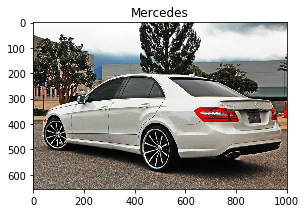

In [ ]:

merc_correct = merc_df.loc[merc_df['Predictions']!=0&2, 'Filename']
mc_img = merc_correct.iloc[np.random.randint(1,len(merc_correct))]
img_mc = Image.open(mc_img)


f = plt.figure(figsize=(10,10))
a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(img_mc)
a2.set_title('Mercedes')

<a id = 'bmw'></a>

## <font color = 'green'> Results for BMW </font>

* For BMW, we fed the test generator **531 images** 

* Our Model classified **423** of them correctly. That makes our model **79.661%** accurate on BMW images.
    



In [ ]:
bmw_df = results[results['Filename'].str.contains('BMW')]
print(bmw_df['Filename'].count(), 'images were provided for evaluation as BMW or not')

531 images were provided for evaluation as BMW or not


In [ ]:
print('The total number of BMW classified correctly are:', (bmw_df['Predictions'] ==1).sum()) # 151 
print('The percentage of BMW classified correctly is:',((bmw_df['Predictions'] ==1).sum())/(bmw_df['Filename'].count())*100, 
     '%')

The total number of BMW classified correctly are: 531
The percentage of BMW classified correctly is: 100.0 %


<a id  = 'bmw_plots'></a>
## <font color='green'>Let's take a look at the correctly and wrongly classified cars as BMW</font>

Text(0.5,1,'BMW')

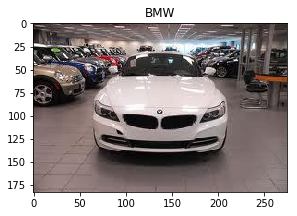

In [ ]:
bmw_car =  bmw_df.loc[bmw_df['Predictions']!=0&3, 'Filename']
# merc_wrong 
car_bmw = bmw_car.iloc[np.random.randint(1,len(bmw_car))]
bmw_img = Image.open(car_bmw)

f = plt.figure(figsize=(10,10))
a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(bmw_img)
a2.set_title('BMW')

<a id = 'Audi'></a>

## <font color ='green'> Results for Audi</font>


* For Audi, we fed the test generator **589 images** 

* Our Model classified **113** of them correctly. That makes our model **19.185%** accurate on BMW images.
    


In [ ]:
audi = results[results['Filename'].str.contains('Audi')]
print(audi['Filename'].count(), 'images were provided for evaluation as Audi or not')

589 images were provided for evaluation as Audi or not


In [ ]:
print('The total number of Audi classified correctly are:', (audi['Predictions'] ==0).sum()) # 151 
print('The percentage of BMW classified correctly is:',((audi['Predictions'] ==0).sum())/(audi['Filename'].count())*100, 
     '%')

The total number of Audi classified correctly are: 0
The percentage of BMW classified correctly is: 0.0 %


<a id  = 'audi-plots'></a>
## <font color='green'>Let's take a look at the correctly and wrongly classified cars as Audi</font>

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Audi')

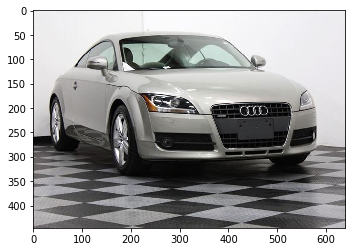

In [ ]:

audi_car =  audi.loc[audi['Predictions']!=2&3, 'Filename']
# merc_wrong 
car_audi = audi_car.iloc[np.random.randint(1,len(audi_car))]
audi_w_img = Image.open(car_audi)

f = plt.figure(figsize=(10,10))
a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(audi_w_img)
a2.set_title('Audi')

<a id = 'final'></a>
# <font color = 'purple'>Results review and future endeavors to improve results</font>

## <font color ='green'>For this model, we fed it pictures for Audi, BMW, Mercedes and asked it to predict images as either cars after traning  on 1036 images with 345 images in validation set. </font>

When we tested this model, we found that:

* It predicted 113 out of 589 picutres of Audis correctly, making it **19.185% accurate for Audi. **

* It predicted 423 out of 531 pictures of BMWs correctly, making it **79.661% accurate for BMW**

* It predicted 151 out of 261 pictures of Mercedes correctly, making it **57.854% accurate for Mercedes.**

## <font color= 'green'>  However, if we were to look at this model from a brand agnostic point of view, it:</font>

* It classified **113 Audis, 423 BMWs and 151  Mercedes** correctly out of **589+531+261=1381** images correctly. 

* That makes this model **47.74% accurate on this dataset.**


## <font color = 'red'> WHY SUCH A LOW ACCURACY? </font>

The main reason that I can see is the size of the dataset that I used. The original dataset, is 8144 images, but I only focused on Audi, BMW and Mercedes which weeded the dataset to 1036 images and that is just not enough to get all the nuances. You would need a better, more augmented dataset.


## <font color = 'red'> WHAT CAN WE DO NOW?</font>
* The obvious answer would be to get more images if we just want to focus on these three brands. 

* WE could also use Keras' inbuilt data augmentation techniques to make our dataset better.. 

* We can tune the hyper parametes such as batch size, the number of layers used. 

## <font color = 'red'> WHAT WILL I DO? </font>

 

Onward to the next horizon!!!

![https://media.giphy.com/media/VKirGWvSa2EAo/giphy.gif](https://media.giphy.com/media/VKirGWvSa2EAo/giphy.gif)


